In [1]:
from mpl_toolkits.basemap import Basemap

In [3]:
import pandas

 - computing KDE in spherical coordinates
 - plot coastlines using basemap
 - computing KDE in spherical coordinates


<ipython-input-6-6c8c71d2a022>:82: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='cyl', llcrnrlat=Y.min(),
<ipython-input-6-6c8c71d2a022>:86: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries()


 - plot coastlines using basemap


<ipython-input-6-6c8c71d2a022>:82: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(projection='cyl', llcrnrlat=Y.min(),
<ipython-input-6-6c8c71d2a022>:86: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m.drawcountries()


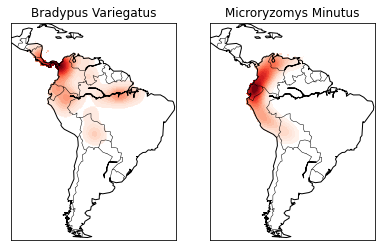

In [6]:
from mpl_toolkits.basemap import Basemap
from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False

def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)

data = fetch_species_distributions()
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype='int')
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9998], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()

In [4]:
conda install scikit-learn

Solving environment: done

## Package Plan ##

  environment location: /home/hat/anaconda3/envs/matplotlib-conda

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.0.1               |     pyhd3eb1b0_0         208 KB
    scikit-learn-0.24.1        |   py38ha9443f7_0         5.4 MB
    scipy-1.6.2                |   py38h91f5cce_0        15.6 MB
    ------------------------------------------------------------
                                           Total:        21.2 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-1.0.1-pyhd3eb1b0_0
  libgfortran-ng     pkgs/main/linux-64::libgfortran-ng-7.3.0-hdf63c60_0
  scikit-learn       pkgs/main/linux-64::scikit-learn-0.24.1-py38ha9443f7_0
  scipy              pkgs/main/linux-64::scipy-1.6.2-py38h91f5cce_0
  threadpoolctl      pkgs/main/noarch::th